# TP 4 - Modulation et démodulation synchrone


> **Capacités mises en oeuvre**  
> * Obtenir un signal de valeur moyenne, de forme, d’amplitude et de fréquence données.
> * Gérer, dans un circuit électronique, les contraintes liées à la liaison entre les masses.
> * Choisir de façon cohérente la fréquence d’échantillonnage, et la durée totale d’acquisition.
> * Effectuer l’analyse spectrale d’un signal périodique à l’aide d’un oscilloscope numérique ou d’une carte d’acquisition.

In [1]:
import requests

f = open("Signal1.jpeg", "wb")
response = requests.get("https://ledourmorvan.github.io/TP04-Demodulation/Signal1.jpeg")
f.write(response.content)
f.close()
f = open("Signal2.jpeg", "wb")
response = requests.get("https://ledourmorvan.github.io/TP04-Demodulation/Signal2.jpeg")
f.write(response.content)
f.close()
f = open("Signal3.jpeg", "wb")
response = requests.get("https://ledourmorvan.github.io/TP04-Demodulation/Signal3.jpeg")
f.write(response.content)
f.close()
f = open("spectre.jpeg", "wb")
response = requests.get("https://ledourmorvan.github.io/TP04-Demodulation/spectre.jpeg")
f.write(response.content)
f.close()

import os
os.listdir()

['Signal1.jpeg', 'Signal2.jpeg', 'Signal3.jpeg', 'spectre.jpeg']

## I - Principe

On ne peut pas transmettre directement par voie hertzienne un signal
acoustique (de fréquence de l’ordre du kHz). Une des raisons tient aux
dimensions de l’antenne qui doivent être de l’ordre de grandeur de celle
de la longueur d’onde du signal à transmettre. Comme $\lambda=c/f$, les
dimensions en seraient prohibitives.

On émet donc un signal de fréquence beaucoup plus élevée, de l’ordre de
MHz, appelée porteuse, dont l’amplitude va être modulée par le signal à
transmettre, le « signal modulant ». C’est le signal modulé, porteur d
e l’information initiale, qui sera émis par l’émetteur radio et transmis
jusqu’au récepteur.

Il est donc nécessaire pour cela de réaliser une modulation d’amplitude
(il est aussi possible de réaliser des modulations de fréquence ou de
 phase, mais ce n’est pas l’objet du T.P.).

## II - La modulation

On introduit ainsi :

 * le signal modulant $V_m\cos(\omega t)$, de pulsation $\omega$, auquel un ajoute un terme constant $V_0$ : $$v_m = V_0 + V_m\cos(\omega t)\ .$$ 

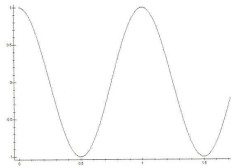

![](filesystem:/Signal1.jpeg)
<p style="text-align: center;">Figure n°1 : allure du signal modulant</p>

* la porteuse $v_p = V_p\cos(\Omega t)$ de pulsation $\Omega$.


**Etude théorique**

> 1. Montrer que le signal modulé $v(t) = kv_p(t)v_m(t)$ peut s’écrire sous la forme :
$$v(t)=A\cos(\Omega t)+\frac{Am}{2}\cos[(\Omega-\omega)t] +\frac{Am}{2}\cos[(\Omega + \omega)t]\ ,$$
avec $A = kV_p V_0$ et $m = V_m/V_0$.

On remarque sur les figures 2 et 3 l’influence du taux de modulation $m$. 

![](filesystem:/Signal2.jpeg)
<p style="text-align: center;">Figure n°2 : signal modulé ($m<1$)</p>

![](filesystem:/Signal3.jpeg)
<p style="text-align: center;">Figure n°3 : signal modulé ($m>1$)</p>

## III - Le multiplieur

Le circuit multiplieur AD633, alimenté par une double tension continue symétrique $\pm15$ V, fournit une tension $U = kU_1 U_2$.
Il possède les caractéristiques suivantes :

* un facteur de réduction $k = 0,1 \mbox{ V}^{-1}$ ;
* une impédance d’entrée très élevée, de l’ordre de $10 \mbox{ M$\Omega$}$ ;
* une bande passante de $500\mbox{ kHz}$ ;
* tension de sortie comprise entre $-15\mbox{ V}$ et $15\mbox{ V}$ ;
* un courant de sortie limité à $300\mbox{ mA}$.

**Attention à ne pas faire fonctionner ce circuit sur une résistance de charge trop faible.**

**Explications sur les indications notées sur le multiplieur AD633JN**

La relation générale entrée-sortie s’écrit :
$$W = k(X_1 − X_2 )(Y_1 − Y_2) + Z\ ,$$
soit, en exprimant toute les tensions en Volt,
$$W = \frac{(X_1 - X_2 )(Y_1 - Y_2)}{10} +Z\ .$$
On note que pour $X_1 = Y_1 = 10\mbox{ V}$ et $X_2 = X_2 = Z = 0\mbox{ V}$, on obtient un signal de sortie $W = 10\mbox{ V}$, ce qui évite de faire apparaître une saturation en tension de sortie.

**Recommandations importantes concernant le branchement :**

* Ne pas intervertir les tensions d’alimentation sous peine de destruction du composant.
* Ne pas dépasser $12\mbox{ V}$ sur chaque entrée.
* Les entrées non utilisées ($X_2$, $Y_2$ et $Z$) doivent être reliées à la masse pour ne pas capter de tensions parasites.

## IV - Etude de la modulation

Le signal modulant et la porteuse sont générés par les deux sorties d'un même GBF numérique.

>**Manipulations**
> 1. Sur la voie 1 du GBF, générer le modulant avec $V_m = 4\mbox{ V}$ et $f_m = 500\mbox{ Hz}$. Vérifier l’allure du signal à l’oscilloscope.
> 2. Sur la voie 2 du GBF, générer la porteuse $V_p = 2\mbox{ V}$ et $f_m = 5\mbox{ kHz}$. Vérifier l’allure du signal à l’oscilloscope.
> 3. Alimenter le multiplicateur à l’aide de l’alimentation stabilisée $-15\mbox{ V}$, $0\mbox{ V}$, $15\mbox{ V}$. Connecter les sorties de chacun des GBF aux deux entrées $X_1$ et $X_2$ du multiplieur.
> 4. Visualiser la porteuse ainsi que le signal correspondant à la sortie du multiplieur. Sur quelle voie doit-on synchroniser l’oscilloscope pour avoir un signal net ?
> 5. Visualiser le spectre (menu math, FFT). Le signal correspond à la porteuse est-il présent ? Interpréter.
> 6. Ajouter une tension continue de décalage (Offset) $V_0 = 1\mbox{ V}$ au signal modulant. Qu’observe-t-on ?

## V - La démodulation

### A - Problématique

Le récepteur capte donc le signal modulé
$$v(t) = A\cos(\Omega t) +\frac{Am}{2}\cos[(\Omega - \omega)t] +\frac{Am}{2}\cos[(\Omega + \omega)t]\ .$$
Or seule la partie utile est le signal correspondant à l’information que l’on voulait transmettre, c-à-d $v_m = +V_m\cos(\omega t)$. Il faut alors « démoduler » le signal reçu.

Il existe plusieurs méthode pour réaliser cette démodulation. Dans ce TP, nous mettons en œuvre une démodulation synchrone

### B - Détection synchrone

Dans la détection synchrone, la tension modulée est multipliée par une tension sinusoïdale dont la fréquence est exactement celle de la porteuse (d’où le qualificatif de synchrone). Elle nécessite donc un nouveau multiplieur, qui réalise le produit de signal modulé $v(t)$ et du signal délivré par l’oscillateur local $u_0(t)=U_0\cos(\Omega t)$.
En pratique, on ne dispose pas à la réception de cet oscillateur à la même fréquence de la porteuse, une telle tension n’est disponible qu’au niveau de l’antenne émettrice, souvent à plusieurs centaines de kilomètres du récepteur. . . Il faut donc reconstituer un signal
synchrone de la porteuse à partir du signal modulé, ce qui met en jeu un circuit dit « boucle à verrouillage de phase ».

**Partie théorique** 

En pratique, dans le TP, on réutilise la porteuse $v_p = V_p\cos(\omega t)$ (voie 2 du GBF) pour effectuer la démodulation.

Montrer qu’en sortie du second multiplieur, le signal $s(t) = kv_p v$ s’écrit :

$$s(t)=kAV_P\left\{\frac12 +\frac m2\cos(\omega t) +\frac m4\cos[(2\Omega -\omega)t] +\frac12\cos(2\Omega t) +\frac m4\cos[(2\Omega+\omega)t]\right\}\ .$$

Le spectre attendu est représenté sur la figure 4 :
![](filesystem:/spectre.jpeg)
<p style="text-align: center;">Figure n°4 : spectre</p>

>**Manipulations**
>1. Alimenter le second multiplieur à l’aide de l’alimentation stabilisée $-15\mbox{ V}$, $0\mbox{ V}$, $15\mbox{ V}$.
>2. Connecter la voie 2 du GBF et la sortie du premier multiplieur aux entrées $X_1$ et $X_2$ du second. Visualiser la sortie du second multiplieur à l’oscilloscope.
>3. Visualiser le spectre (menu math, FFT). Le signal correspond-il au spectre attendu ?
>4. Quel est la nature du filtre à employer afin de récupérer le signal modulant ? Avec quelle pulsation de coupure (on pourra faire passer la fréquence de la porteuse à $50\mbox{ kHz}$ pour rendre la filtrage plus efficace) ?
> 5. Mettre en œuvre le filtre avec les boites de capacités et de résistances et observer le signal démodulé. Commenter.